Marche sur commit 102738512a19b3cae110dc9ae20c29823811d769 (2015-05-05)

In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
#from openfisca_matplotlib import graphs
import numpy as np

In [117]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français
from openfisca_france.tests import base
#from modulation_allocations_familiales.reforms import af_modulation

TaxBenefitSystem = openfisca_france.init_country()  # Initialisation de la classe décrivant le système socio-fiscal français
print TaxBenefitSystem
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français

from openfisca_core import periods

<class 'openfisca_france.TaxBenefitSystem'>


In [118]:
salaire_imposable_minimal = 0
salaire_imposable_maximal = 200000

In [119]:
def couple_avec_enfants(nombre_enfants = 2, year = 2014):
    enfant = [dict(
        birth = date(2005, 1, 1),
        )]
    enfants = enfant * nombre_enfants
    simulation = tax_benefit_system.new_scenario().init_single_entity(
        axes = [
            dict(
                count = 200,
                min = 0,
                max = salaire_imposable_maximal * 3,
                name = 'sal',
                ),
            ],
        period = "{}:3".format(year-2),
        parent1 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5, #pacsés
            ),
        parent2 = dict(
            birth = date(1980, 1, 1),
            statmarit = 5,
            ),
        enfants = enfants,
        ).new_simulation(debug = True)
    return simulation

# Avantage du QF:

In [120]:
year = 2016

In [121]:
salaire_imposable = couple_avec_enfants(nombre_enfants = 0, year = year).calculate('sal', '2016')[::2]

In [122]:
couple_2_enfant = couple_avec_enfants(nombre_enfants = 2,year = year)
ir_plaf_qf = couple_2_enfant.calculate('ir_plaf_qf', period = year)
avantage_qf = couple_2_enfant.calculate('avantage_qf', period = year)

In [125]:
import pandas as pd
assert salaire_imposable.shape == ir_plaf_qf.shape
nb_enf_to_avantage_qf = dict()
for nb_enf in range(0,5):
    nb_enf_to_avantage_qf['avantage qf {} enfant(s)'.format(nb_enf)] = \
    couple_avec_enfants(nombre_enfants = nb_enf, year = year).calculate('avantage_qf', period = year)
df2 = pd.DataFrame(nb_enf_to_avantage_qf)

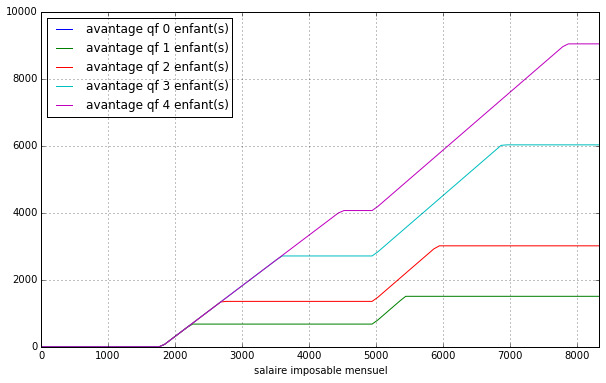

In [139]:
df2.index = salaire_imposable/12
#print df2.index
df2.columns
df2.index
plt.figure(); plot2 = df2.plot(grid = True, figsize= [10,6]) ; plt.xlim([0,100000/12])
plot2.set_xlabel('salaire imposable mensuel')

In [127]:
def mjrFormatter(x,pos):
    if len(str(int(x))) < 4:
        string = str(int(x))
    if len(str(int(x)))>=4 : 
        string = "{} {}".format(str(int(x))[:-3], str(int(x))[-3:])
    return string
def mjrcommaFormatter(x,pos):
    return u"{},{}%".format(str(x)[0],str(x)[-1])

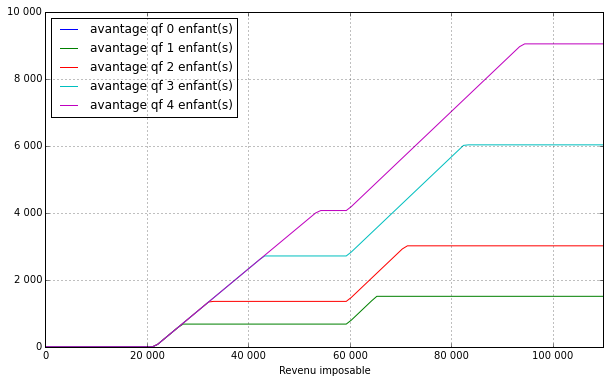

In [128]:
import matplotlib.ticker as mtick
df2.index = salaire_imposable
#print df2.index
df2.columns
df2.index
plt.figure(); plot2 = df2.plot(grid = True, figsize= [10,6]) ; plt.xlim([0,110000])
plot2.set_xlabel('Revenu imposable')
plot2.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(mjrFormatter))
plot2.get_xaxis().set_major_formatter(
    mtick.FuncFormatter(mjrFormatter))

In [129]:
df2.index.name = 'salaire imposable'
df2[::10]

,avantage qf 0 enfant(s),avantage qf 1 enfant(s),avantage qf 2 enfant(s),avantage qf 3 enfant(s),avantage qf 4 enfant(s)
salaire imposable,,,,,
0.000000,0,0.000000,0.000000,0.000000,0.000000
10050.250977,0,0.000000,0.000000,0.000000,0.000000
20100.501953,0,0.000000,0.000000,0.000000,0.000000
30150.751953,0,678.300049,1085.805298,1085.805298,1085.805298
40201.003906,0,678.300171,1356.599854,2352.140625,2352.140625
50251.253906,0,678.299805,1356.600098,2713.199951,3618.475586
60301.503906,0,797.260254,1475.560059,2832.160400,4188.760254
70351.757812,0,1508.000000,2922.801270,4279.401367,5636.000977
80402.007812,0,1508.000000,3016.000000,5726.640625,7083.241211


L'avantage du QF par demie-part est de : 

In [110]:
print couple_2_enfant.legislation_at(periods.period("2015").start).ir.plafond_qf.marpac, "euros"

1508 euros


In [111]:
qf = couple_2_enfant.legislation_at(periods.period("2015").start).ir.quotient_familial
qf.keys()
qf.values()

CompactNode({'not31b': 0.5, 'not31a': 0.5, 'not6': 0.5, 'cdcd': 0.0, 'inv2': 0.5, 'inv1': 0.5, 'isol': 0.5, 'not32': 0.5, 'not42': 0.5, 'enf2': 1.0, 'conj': 1.0, 'not41': 0.5, 'enf1': 0.5})

In [130]:
dict_qf = dict()  #TODO : faire ça proprement (et efficacement)
for key in qf.keys() : 
    dict_qf[key] = qf.values()
df3 = pd.DataFrame(dict_qf) 
df3

,cdcd,conj,enf1,enf2,inv1,inv2,isol,not31a,not31b,not32,not41,not42,not6
0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
6,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
7,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
8,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Fonction donnant l'avantage pour toutes les années :

In [131]:
def make_dict_qf(year = 2016):
    assert salaire_imposable.shape == ir_plaf_qf.shape
    nb_enf_to_avantage_qf = dict()
    for nb_enf in range(0,5):
        nb_enf_to_avantage_qf['avantage qf {} enfant(s)'.format(nb_enf)] = \
        couple_avec_enfants(nombre_enfants = nb_enf, year = year).calculate('avantage_qf', period = year)
    return pd.DataFrame(nb_enf_to_avantage_qf)

In [134]:
def print_av_qf_per_nb_enf(year = 2016):
    df = make_dict_qf(year = year)
    df.index = salaire_imposable
    #print df2.index
    df.columns
    df.index
    plt.figure(); plot = df.plot(grid = True, figsize= [10,6],) ; plt.xlim([0,200000]); 
    plt.title('Avantage QF en {} '.format(year));
    return plot.set_xlabel('salaire imposable')

Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')
Text(0.5,0,u'salaire imposable')


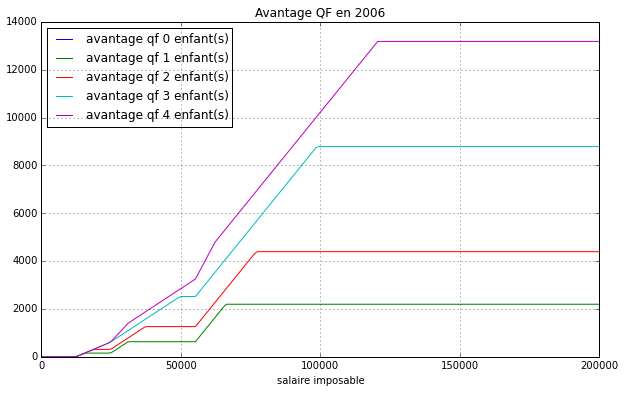

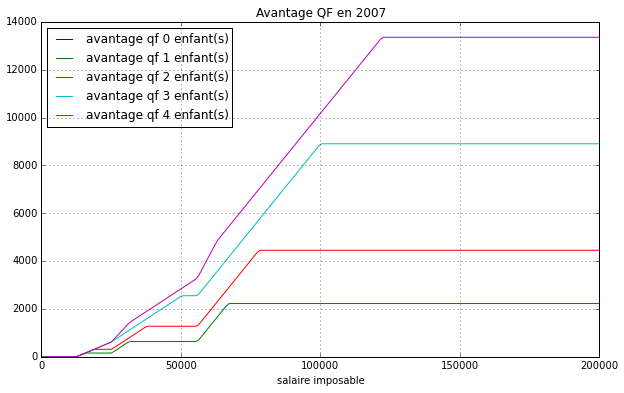

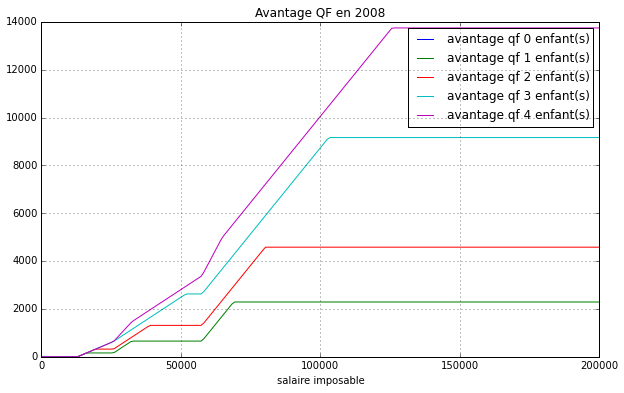

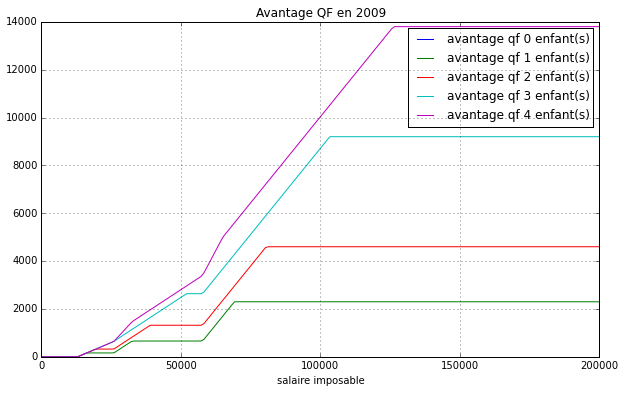

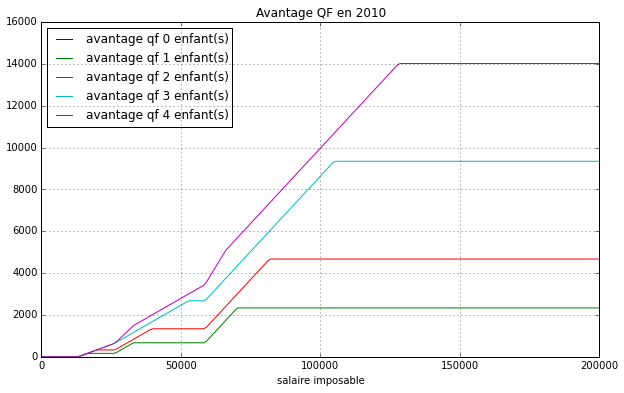

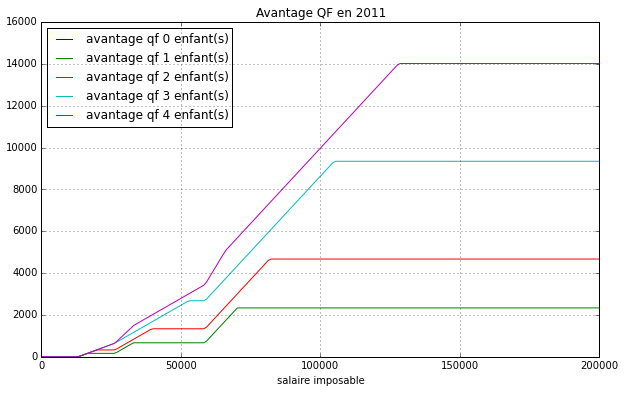

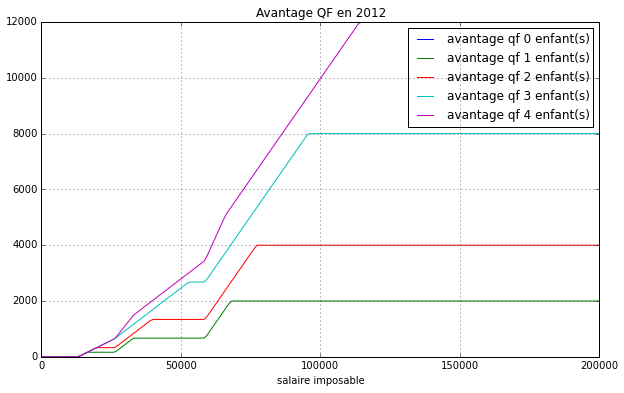

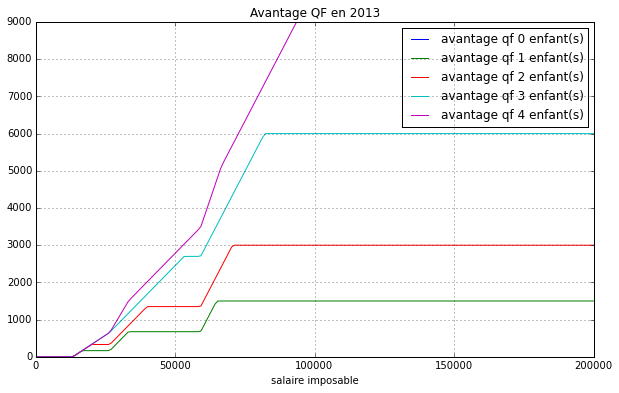

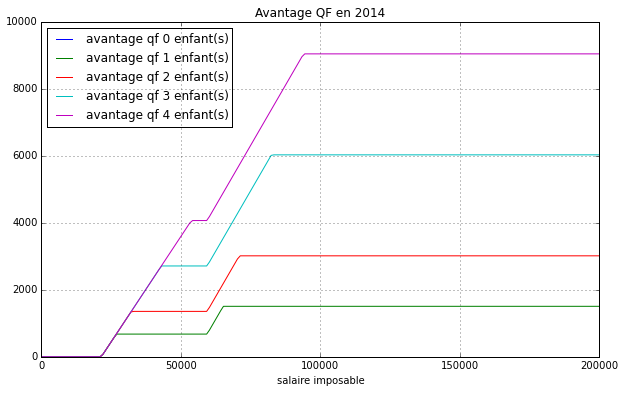

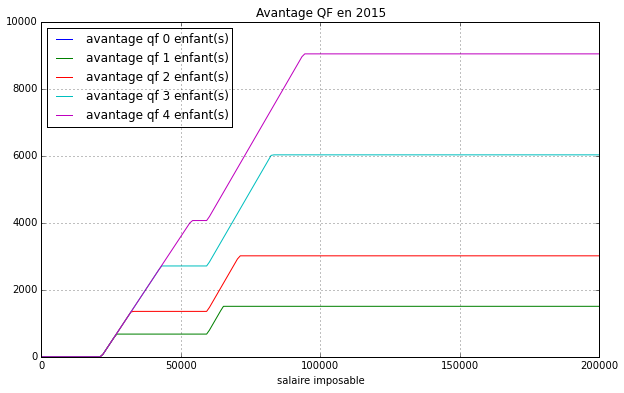

In [135]:
for year in range (2006,2016):
    print print_av_qf_per_nb_enf(year = year)